Support Vector Machines

一、适用范围

适用于复杂的中小型数据集的分类

二、线性SVM分类器

1、基本原理：SVM通过找到最优的决策边界（超平面）来区分数据集中的不同类别。这个决策边界的选择旨在最大化样本间的间隔。

2、注意事项：对训练集数据的尺度敏感，需要预先标准化。

3、Soft Margin Classification:

（1）硬边距分类：同一类别的数据点一定都被归在马路一侧；适用范围：只适用于线性可划分的情况，对于异常点十分敏感。

（2）软边距分类：保持样本间的间隔的最大化和边界违规的最小化的平衡。

基本原理：通过超参数C调节模型对于间隔最大化或边界违规最小化的倾向。

C越大，意味着模型对于边界违规的惩罚越重。此时，模型会为了确保所有数据点的正确分类而牺牲间隔最大化，可能会出现过拟合的情况。

Tip:SVM分类器并不会像逻辑分类器一样，给出训练点属于每一类的概率。

使用线性SVC，需要预先对数据进行预处理（减去数据集的平均值）

loss="hinge"(不是默认的，需要手动设置)

dual=False(除非特征数量多于训练集的点数)

三、非线性SVM分类器

1、Polynominal Kernel

2、添加相似性特征：关键在于地标的合理选择

3、Gaussian RBF kernel

四、内核选择的优先级

1、linear kernel（LinearSVC远快于SVC(kernel="linear")）
2、Gaussian RBF kernel

五、SVM线性拟合

六，SVM算法的底层逻辑


In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [12]:
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]#petal length & petal width
y=(iris["target"]==2).astype(np.float64)
svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
    ])#较大的C值意味着对于边界违规的惩罚更重，此时模型会尽量实现所有数据点的正确分类，因此样本间隔过小（即出现过度拟合的情况）
svm_clf.fit(X,y)
svm_clf.predict([[5.5,1.7]])

c:\Users\youyiting\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([1.])

In [13]:
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]#petal length & petal width
y=(iris["target"]==2).astype(np.float64)
svc_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",SVC(kernel="linear",C=1))
    ])#较大的C值意味着对于边界违规的惩罚更重，此时模型会尽量实现所有数据点的正确分类，因此样本间隔过小（即出现过度拟合的情况）
svc_clf.fit(X,y)
svc_clf.predict([[5.5,1.7]])

array([1.])

In [17]:
m=2#训练集包含的特征数量
C=1#正则化参数/惩罚超参数
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]#petal length & petal width
y=(iris["target"]==2).astype(np.float64)
svc_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",SGDClassifier(loss="hinge",alpha=1/m*C))
    ])#较大的C值意味着对于边界违规的惩罚更重，此时模型会尽量实现所有数据点的正确分类，因此样本间隔过小（即出现过度拟合的情况）
svc_clf.fit(X,y)
svc_clf.predict([[5.5,1.7]])

array([1.])

c:\Users\youyiting\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\youyiting\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


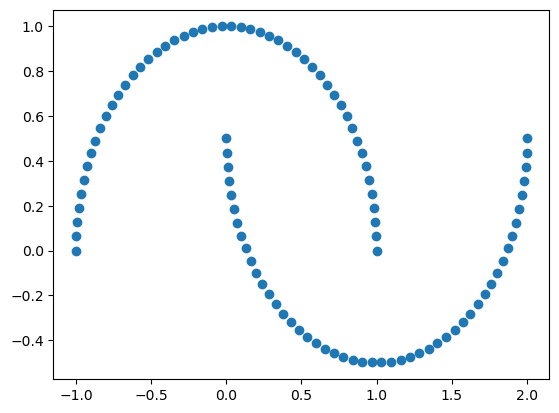

In [28]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
X,y=datasets.make_moons()
polynominal_svm_clf=Pipeline([("poly_features",PolynomialFeatures(degree=3)),("scaler",StandardScaler()),("svm_clf",LinearSVC(C=10,loss="hinge"))])
polynominal_svm_clf.fit(X,y)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [29]:
#polynominal kernel
from sklearn.svm import SVC
poly_kernel_svc_clf=Pipeline([("scaler",StandardScaler()),("svc_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))])#coef0代表在多项式核函数中添加了偏置项
poly_kernel_svc_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid=[{"kernel":["poly"],"degree":[i for i in range(3,11)],"coef0":[i for i in range(1,101)],"C":[5]}]
grid_search=GridSearchCV(SVC(),param_grid,)
grid_search.fit(X,y)
grid_search.best_params_

{'C': 5, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}

In [33]:
#Gaussian rbf kernel
poly_rbf_kernel_svm_clf=Pipeline([("scaler",StandardScaler()),("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))])#gamma超参数用于调节高斯函数的宽度，使得每个点的影响范围变小，使得决策边界变得更加不规则，有过拟合的风险，就像软边距分类器中的超参数C一样
poly_rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [35]:
#SVM线性拟合
from sklearn.svm import LinearSVR
svm_reg=Pipeline([("scaler",StandardScaler()),("svm_reg",LinearSVR(epsilon=1.5))])
svm_reg.fit(X,y)

c:\Users\youyiting\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(epsilon=1.5))])

In [38]:
#SVM多项式拟合
from sklearn.svm import SVR
svm_poly_reg=Pipeline([("scaler",StandardScaler()),("svm_reg",SVR(kernel="poly",degree=2,C=0.01,epsilon=0.1))])
svm_poly_reg.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', SVR(C=0.01, degree=2, kernel='poly'))])